### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [41]:
# Import modules
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
import matplotlib.pyplot as plt

## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

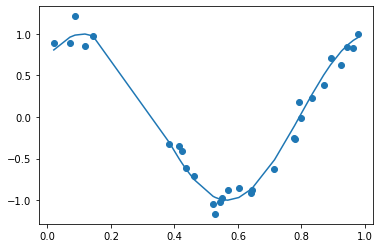

In [42]:
# Define the function to generate data points
def generate_points(input_points):
    output_points = np.sin(2.2*np.pi*input_points + 0.8)
    return output_points

# Initialize random seed
np.random.seed(0)
input_points = np.random.uniform(0,1,size=(30,1))
input_points = np.sort(input_points,axis=0)
output_points = generate_points(input_points)

# Generate noisy data points: (x,y)
noise = np.random.normal(loc=0,scale=0.1,size=(30,1))
output_points_noise = output_points + noise

# Plot true model and sampled data points
plt.plot(input_points,output_points)
plt.scatter(input_points,output_points_noise)

## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

w0:  [0.06038094] w1:  [[-0.19787027]]


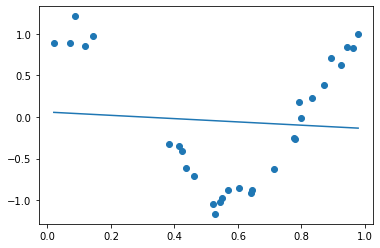

In [43]:
# Fit a linear model in the original space
linear_model = LinearRegression()
linear_model.fit(input_points,output_points_noise)
w0, w1 = linear_model.intercept_, linear_model.coef_
print("w0: ",w0,"w1: ",w1)

# Plot fitted linear model
predicted = linear_model.predict(input_points)
plt.plot(input_points,predicted)
plt.scatter(input_points,output_points_noise)

## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

In [44]:
# Augment the original feature to a 15-vector
def total_feature_generate(input_points):
    total_feature = input_points
    for i in range(14):
        new_feature = np.power(input_points,i+2)
        total_feature = np.concatenate((total_feature,new_feature),axis=1)
    return total_feature


Weights, the first term is the bias: 
 [ 3.11668855e+01 -2.97811934e+03  1.03893518e+05 -1.87420290e+06
  2.03717119e+07 -1.44873537e+08  7.09317173e+08 -2.47066536e+09
  6.24563083e+09 -1.15676914e+10  1.56895523e+10 -1.54006637e+10
  1.06457712e+10 -4.91379706e+09  1.35920276e+09 -1.70381611e+08]
Score: 0.9914608458991773


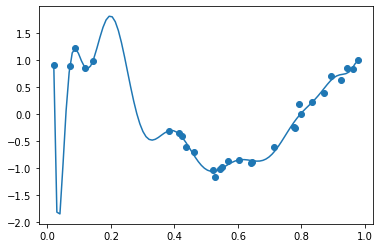

In [45]:
# Fit linear model to the generated 15-vector features
total_feature = total_feature_generate(input_points)
poly_linear_model = LinearRegression()
poly_linear_model.fit(total_feature,output_points_noise)
w = np.zeros(16)

w[0] = poly_linear_model.intercept_
w[1:] = poly_linear_model.coef_
print("Weights, the first term is the bias: \n",w)
print("Score:",poly_linear_model.score(total_feature,output_points_noise))

predicted = poly_linear_model.predict(total_feature)

# Plot fitted curve and sampled data points
x = np.linspace(np.min(input_points),np.max(input_points),100)
x = x.reshape(-1,1)
#print(x)
x_total_feature = total_feature_generate(x)
y = poly_linear_model.predict(x_total_feature)
#print(x)
#plt.plot(input_points,predicted)
plt.plot(x,y)
plt.scatter(input_points,output_points_noise)

## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

[ 0.97968677 -3.61175387  0.          0.          4.05737553  0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.        ] 
Score 0.8642604684665177


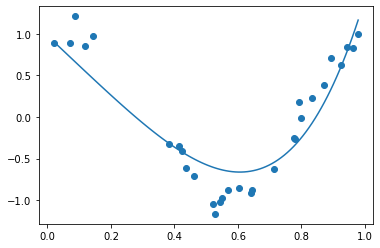

In [46]:
# Fit 15-degree polynomial with L1 regularization 
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
lasso_regression = Lasso(alpha=.01,max_iter=1e4)
# Plot fitted curve and sampled data points
lasso_regression.fit(total_feature,output_points_noise)
#w holds the weights
w = np.zeros(16)
w[0] = lasso_regression.intercept_
w[1:] = lasso_regression.coef_
print(w,"\nScore",lasso_regression.score(total_feature,output_points_noise))
predicted = lasso_regression.predict(x_total_feature)

plt.plot(x,predicted)
plt.scatter(input_points,output_points_noise)

[  1.06843622   0.2167843  -14.45629376   5.73351697  14.49985714
   0.           0.          -0.          -0.          -5.1753093
  -2.49636651  -0.          -0.          -0.           0.
   1.45189882] 
Score 0.9747580523845099


/home/akshay/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02063625723763507, tolerance: 0.0017515538543778103
  model = cd_fast.enet_coordinate_descent(


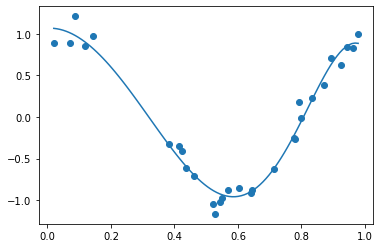

In [47]:
lasso_regression = Lasso(alpha=.0001,max_iter=1e4)
# Plot fitted curve and sampled data points
lasso_regression.fit(total_feature,output_points_noise)
#w holds the weights
w = np.zeros(16)
w[0] = lasso_regression.intercept_
w[1:] = lasso_regression.coef_
print(w,"\nScore",lasso_regression.score(total_feature,output_points_noise))
predicted = lasso_regression.predict(x_total_feature)

plt.plot(x,predicted)
plt.scatter(input_points,output_points_noise)

## Reporting best lambda and weights

In [48]:
print("weights: The first value is the intercept:\n",w)
print("lambda = .0001")

weights: The first value is the intercept:
 [  1.06843622   0.2167843  -14.45629376   5.73351697  14.49985714
   0.           0.          -0.          -0.          -5.1753093
  -2.49636651  -0.          -0.          -0.           0.
   1.45189882]
lambda = .0001


## Observations
As the value of lambda decreases the value the number of non-zero elements in the weights decreases. For example lambda = 0.0001 has 8 non-zero values as compared to 4 non zero values when lambda=.01. This means increasing lambda tries to underfit the data. **Increasing lambda decreases the weights** 

## Understanding of lasso
As any regularization method lasso also tries to reduce overfitting.The a proportion(ie lambda times) magnitudes of the weights are subtracted from the weights in the training process. Lasso can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. This means that lasso can also help in completely removing some features which cause overfitting by making their weights 0.

## Tweaking lambda
So when lambda is decreases, overfitting increases. I have displayed the scores for two different values of lambda. When lambda is very high the model is very underfitted.

## P5. Ridge regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L2 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

weights: (The first value is the intercept):
 [ 1.297752   -4.21231562 -1.58994435  1.38570425  2.48459438  2.39535518
  1.78896615  1.05511527  0.38500882 -0.14394475 -0.51380601 -0.73493061
 -0.82911584 -0.82098452 -0.73390704 -0.58833042]
0.9533749611502453


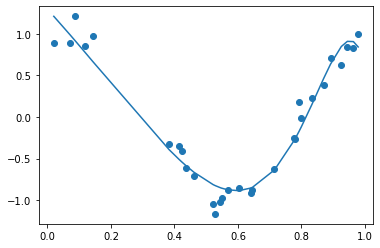

In [49]:
# Fit 15-degree polynomial with L2 regularization
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
ridge_regression_model = Ridge(alpha=0.01,max_iter=1e4)
ridge_regression_model.fit(total_feature,output_points_noise)

predicted = ridge_regression_model.predict(total_feature)
w = np.zeros(16)
w[0] = ridge_regression_model.intercept_
w[1:] = ridge_regression_model.coef_
plt.plot(input_points,predicted)
plt.scatter(input_points,output_points_noise)
# Plot fitted curve and sampled data points and compare to L1 regularization from P4
print("weights: (The first value is the intercept):\n",w)
print(ridge_regression_model.score(total_feature,output_points_noise))

## The best value of lambda found is .0001

weights: (The first value is the intercept):
 [  0.94933395   1.90502172 -17.24276774   4.25002429  11.61238507
   9.20596081   3.83848301  -1.02446738  -4.18410939  -5.53450391
  -5.38543602  -4.13771324  -2.15164759   0.29118807   2.98672066
   5.79387602]
0.9804373188863559


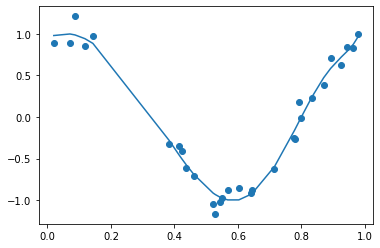

In [50]:
ridge_regression_model = Ridge(alpha=0.0001,max_iter=1e4)
ridge_regression_model.fit(total_feature,output_points_noise)

predicted = ridge_regression_model.predict(total_feature)
w = np.zeros(16)
w[0] = ridge_regression_model.intercept_
w[1:] = ridge_regression_model.coef_
plt.plot(input_points,predicted)
plt.scatter(input_points,output_points_noise)
# Plot fitted curve and sampled data points and compare to L1 regularization from P4
print("weights: (The first value is the intercept):\n",w)
print(ridge_regression_model.score(total_feature,output_points_noise))